In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the provided data set
df = pd.read_csv('/content/greendestination (1).csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# Exploring the data set
df.info()
df.describe()
df['Attrition'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,count
Attrition,
No,1233
Yes,237


In [5]:
# Calculating the attrition rate from the provided data set
attrition_rate = df['Attrition'].value_counts(normalize=True)['Yes'] * 100
print(f"Attrition Rate: {attrition_rate:.2f}%")

Attrition Rate: 16.12%


In [12]:
# Clean the dataset

columns_to_drop = ['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

In [13]:
# Convert Attrition to Binary

df['Attrition_Flag'] = df['Attrition'].map({'Yes': 1, 'No': 0})


In [14]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Flag
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,1,6,3,3,2,2,2,2,0


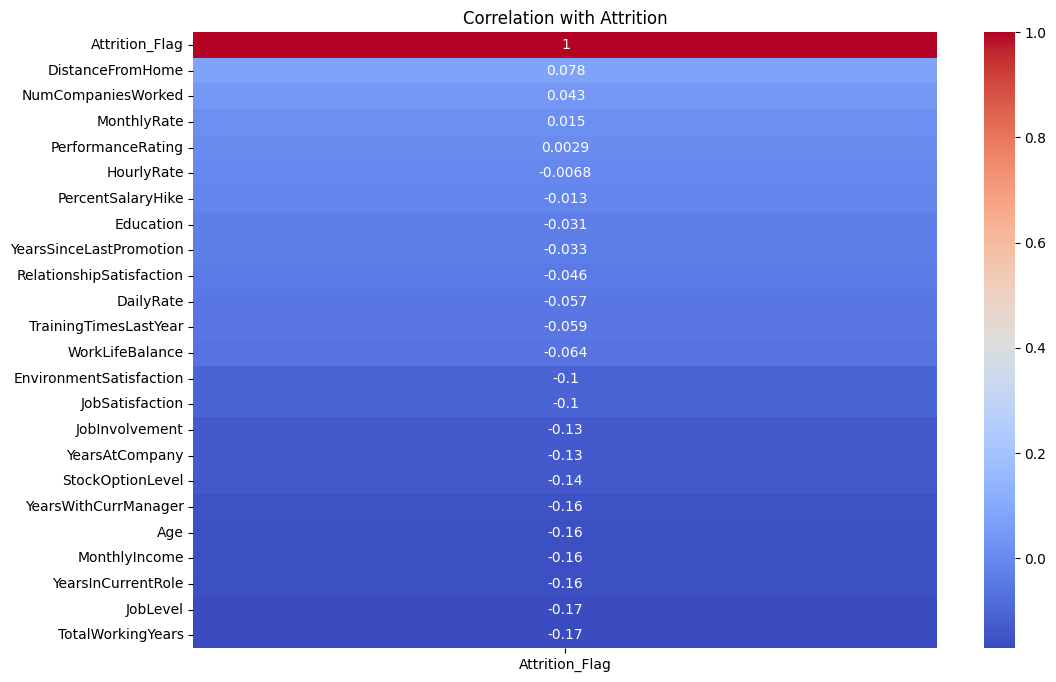

In [15]:
# Performing Visualisations

plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr[['Attrition_Flag']].sort_values(by='Attrition_Flag', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation with Attrition")
plt.show()


/tmp/ipython-input-23-130422955.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Attrition', palette='Set2')


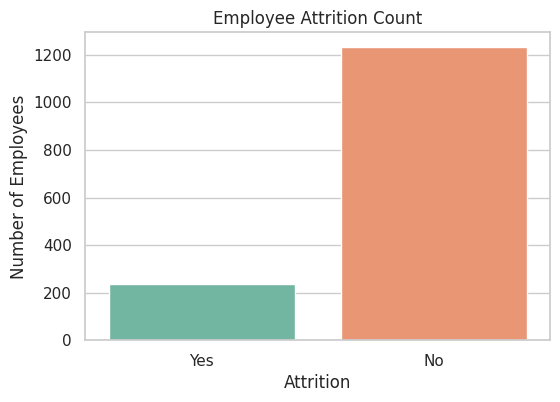

In [23]:
# Set consistent style
sns.set(style="whitegrid")

# 1. Bar Plot - Attrition Count
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Attrition', palette='Set2')
plt.title("Employee Attrition Count")
plt.xlabel("Attrition")
plt.ylabel("Number of Employees")
plt.show()

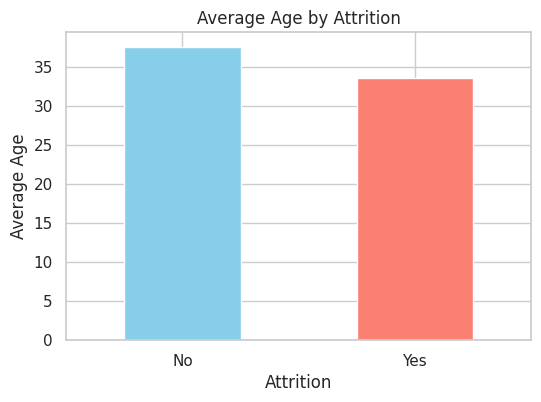

In [24]:
# 2. Bar Plot - Average Age by Attrition
plt.figure(figsize=(6,4))
df.groupby('Attrition')['Age'].mean().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Average Age by Attrition")
plt.ylabel("Average Age")
plt.xticks(rotation=0)
plt.show()

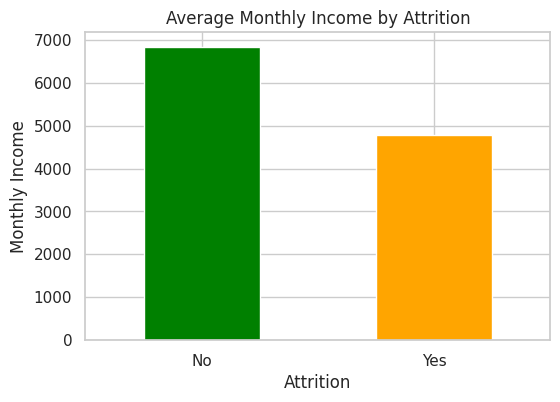

In [25]:
# 3. Bar Plot - Average Monthly Income by Attrition
plt.figure(figsize=(6,4))
df.groupby('Attrition')['MonthlyIncome'].mean().plot(kind='bar', color=['green', 'orange'])
plt.title("Average Monthly Income by Attrition")
plt.ylabel("Monthly Income")
plt.xticks(rotation=0)
plt.show()

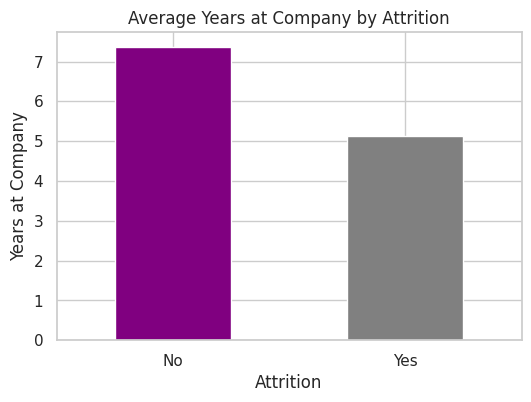

In [26]:
# 4. Bar Plot - Average Years at Company by Attrition
plt.figure(figsize=(6,4))
df.groupby('Attrition')['YearsAtCompany'].mean().plot(kind='bar', color=['purple', 'gray'])
plt.title("Average Years at Company by Attrition")
plt.ylabel("Years at Company")
plt.xticks(rotation=0)
plt.show()